In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('yearly-stats.csv')
df

,TaxonomyLevel,TaxonomyValue,Year,GiniCoefficient,FractionFemale
0,Academia,Academia,2011,0.767,0.311655
1,Academia,Academia,2012,0.767,0.315116
2,Academia,Academia,2013,0.768,0.320851
3,Academia,Academia,2014,0.767,0.325756
4,Academia,Academia,2015,0.766,0.330770
...,...,...,...,...,...
1155,Domain,Social Sciences,2016,0.721,0.371551
1156,Domain,Social Sciences,2017,0.722,0.377408
1157,Domain,Social Sciences,2018,0.714,0.383289
1158,Domain,Social Sciences,2019,0.718,0.391917


In [4]:
df_academia = df[df['TaxonomyLevel'] == 'Academia']
df_math = df[df['TaxonomyValue'] == 'Mathematics']
df_or = df[df['TaxonomyValue'] == 'Operations Research']
df_stats = df[df['TaxonomyValue'] == 'Statistics']
df_math_comp = df[df['TaxonomyValue'] == 'Mathematics and Computing']

Text(0, 0.5, 'Fraction of Women')

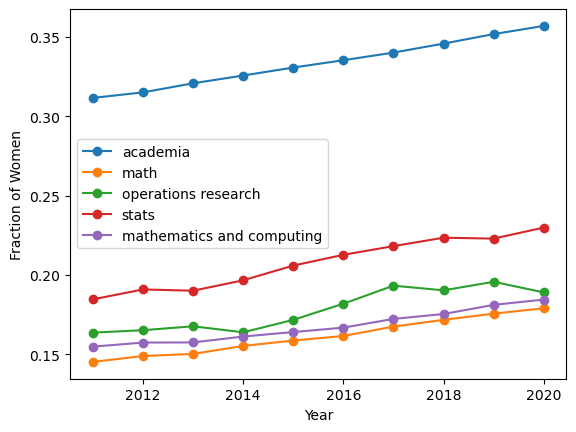

In [5]:
plt.plot(df_academia['Year'], df_academia['FractionFemale'], 'o-', label='academia')
plt.plot(df_math['Year'], df_math['FractionFemale'],'o-', label='math')
plt.plot(df_or['Year'], df_or['FractionFemale'], 'o-', label='operations research')
plt.plot(df_stats['Year'], df_stats['FractionFemale'], 'o-', label='stats')
plt.plot(df_math_comp['Year'], df_math_comp['FractionFemale'], 'o-', label='mathematics and computing')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Fraction of Women')
#plt.title("Fraction of Women in Different Academic Fields from 2011 to 2020 ")

In [6]:
df_math_edges = pd.read_csv('edge-lists - Second Copy of Math_only_.csv')
df_math_edges

,TaxonomyLevel,TaxonomyValue,InstitutionId,InstitutionName,DegreeInstitutionName,DegreeInstitutionId,Total,Men,Women,Percentage of Women
0,Field,Mathematics,82,Georgia Tech,University of Alabama,243.0,1.0,1,0,0
1,Field,Mathematics,82,Georgia Tech,UC Berkeley,251.0,3.0,1,2,0.666666667
2,Field,Mathematics,251,UC Berkeley,UC Berkeley,251.0,7.0,7,0,0
3,Field,Mathematics,82,Georgia Tech,Moscow State University,675522.0,1.0,1,0,0
4,Field,Mathematics,82,Georgia Tech,ETH Zurich,538963.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
6240,Field,Mathematics,29,Bryn Mawr,UC Berkeley,251.0,2.0,1,1,NaN
6241,Field,Mathematics,29,Bryn Mawr,University of Chicago,261.0,1.0,0,1,NaN
6242,Field,Mathematics,29,Bryn Mawr,SUNY Stony Brook,205.0,1.0,0,1,NaN
6243,Field,Mathematics,29,Bryn Mawr,University of Pittsburgh,327.0,1.0,0,0,NaN


In [7]:
df_math_edges['Percentage of Women'] = df_math_edges['Women']/(df_math_edges['Men'] + df_math_edges['Women'])*100
#when we have divide by 0, NaN issues, replace with 0 - CAN CHANGE IF NECESSARY
df_math_edges.replace(np.nan, 0.0)



,TaxonomyLevel,TaxonomyValue,InstitutionId,InstitutionName,DegreeInstitutionName,DegreeInstitutionId,Total,Men,Women,Percentage of Women
0,Field,Mathematics,82,Georgia Tech,University of Alabama,243.0,1.0,1,0,0.000000
1,Field,Mathematics,82,Georgia Tech,UC Berkeley,251.0,3.0,1,2,66.666667
2,Field,Mathematics,251,UC Berkeley,UC Berkeley,251.0,7.0,7,0,0.000000
3,Field,Mathematics,82,Georgia Tech,Moscow State University,675522.0,1.0,1,0,0.000000
4,Field,Mathematics,82,Georgia Tech,ETH Zurich,538963.0,1.0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
6240,Field,Mathematics,29,Bryn Mawr,UC Berkeley,251.0,2.0,1,1,50.000000
6241,Field,Mathematics,29,Bryn Mawr,University of Chicago,261.0,1.0,0,1,100.000000
6242,Field,Mathematics,29,Bryn Mawr,SUNY Stony Brook,205.0,1.0,0,1,100.000000
6243,Field,Mathematics,29,Bryn Mawr,University of Pittsburgh,327.0,1.0,0,0,0.000000


In [8]:
#I'm sure there's a nicer, more elegant way to do this, but it works, so?
institution = df_math_edges['InstitutionName'].unique()
total_men = np.empty(institution.shape)
total_women = np.empty(institution.shape)
total_percentage_of_women = np.empty(institution.shape)

for i in range(len(institution)):
    df_math_edges_temp = df_math_edges[df_math_edges['InstitutionName'] == institution[i]]
    total_women[i] = np.sum(df_math_edges_temp['Women'])
    total_men[i] = np.sum(df_math_edges_temp['Men'])
    total_percentage_of_women[i] = total_women[i] / (total_women[i] + total_men[i]) * 100
    

In [9]:
d = {'InstitutionName': institution, 'Total Men': total_men, 'Total Women': total_women, 'Total Percentage of Women': total_percentage_of_women}
df_data_by_institution = pd.DataFrame(data=d)
#df_data_by_institution[df_data_by_institution["Total Percentage of Women"] >40]
#df_data_by_institution[df_data_by_institution['Total Percentage of Women']<10]

Text(0, 0.5, 'Frequency')

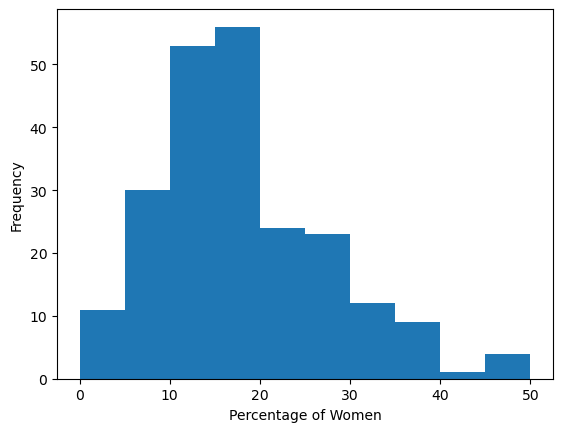

In [10]:
plt.hist(df_data_by_institution['Total Percentage of Women'])
plt.xlabel('Percentage of Women')
plt.ylabel('Frequency')


In [11]:
df_prestige = pd.read_csv('Math faculty data from Wapman, Zhang et al. - Raw_Data (1).csv')
df_prestige = df_prestige[df_prestige['TaxonomyLevel'] == 'Field']
df_prestige

,InstitutionId,InstitutionName,TaxonomyLevel,TaxonomyValue,NonAttritionEvents,AttritionEvents,ProductionRank,PrestigeRank,OrdinalPrestigeRank
0,2,Air Force Institute of Technology,Field,Mathematics,14,6,91,0.118015,202
1,12,Arizona State,Field,Mathematics,38,12,44,0.322709,119
2,15,Auburn,Field,Mathematics,15,3,85,0.271215,140
3,20,Baylor,Field,Mathematics,8,3,116,0.295472,128
4,23,Boston College,Field,Mathematics,4,2,130,0.510189,59
...,...,...,...,...,...,...,...,...,...
156,359,Wayne State,Field,Mathematics,22,5,74,0.453320,82
157,361,Wesleyan,Field,Mathematics,6,3,120,0.433979,94
158,363,Western Michigan,Field,Mathematics,14,4,92,0.350649,111
159,366,Worcester Polytechnic Institute,Field,Mathematics,5,2,136,0.283337,133


In [12]:
#FULL DATA, WHO DAT?
print("Unique values in array1 that are not in array2:")
print(np.setdiff1d(df_data_by_institution['InstitutionName'], df_prestige['InstitutionName']))

Unique values in array1 that are not in array2:
['American' 'Ball State' 'Bard College' 'Barry' 'Brigham Young'
 'Bryn Mawr' 'Claremont Graduate' 'Cleveland State' 'Drew' 'Drexel'
 'East Carolina' 'Florida A&M' 'Florida Atlantic'
 'Florida Institute of Technology' 'Florida International' 'Fordham'
 'George Mason' 'Georgetown' 'IUPUI' 'Miami University'
 'Michigan Technological' 'New Jersey Institute of Technology'
 'New Mexico Tech' 'North Dakota State' 'Northern Arizona'
 'Oakland University' 'Rutgers University - Camden' 'San Diego State'
 'South Dakota Mines' 'South Dakota State'
 'Southern Illinois University Carbondale' 'Texas A&M Corpus Christi'
 'Texas A&M Kingsville' 'UC Merced' 'UMass Boston' 'UMass Dartmouth'
 'UMass Lowell' 'UNC Charlotte' 'UNC Greensboro' 'UT Dallas' 'UT El Paso'
 'UT San Antonio' 'UT Tyler' 'University of Alaska Fairbanks'
 'University of Dayton' 'University of Denver'
 'University of Louisiana Monroe' 'University of Louisville'
 'University of Maine' 'Uni

In [13]:
#Don't judge my naming conventions please, it's part of my process
MAGIC = df_data_by_institution.merge(df_prestige, on = 'InstitutionName')
MAGIC.to_csv("MAGIC")

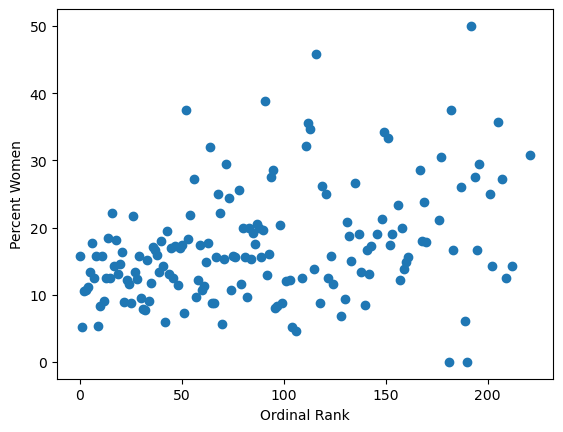

In [14]:
plt.scatter(MAGIC['OrdinalPrestigeRank'], MAGIC["Total Percentage of Women"])
plt.xlabel('Ordinal Rank')
plt.ylabel('Percent Women')
X = np.array(MAGIC['OrdinalPrestigeRank']).reshape((-1,1))
y= np.array(MAGIC["Total Percentage of Women"]).reshape((-1,1))
#Let's make a line because we can
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression().fit(X,y)
#print(reg.score(X,y))
#plt.plot(np.arange(0,220), reg.predict(np.arange(0,220)))

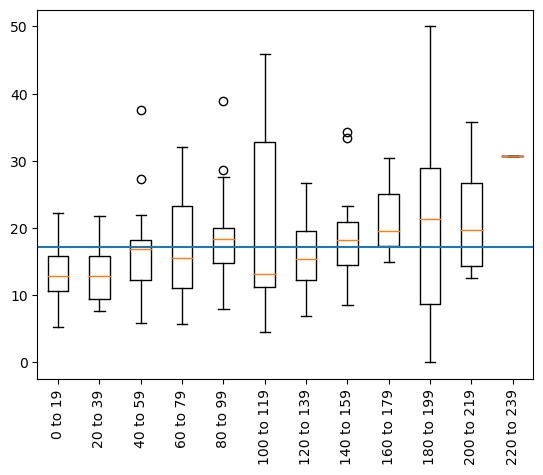

In [15]:
#I'm hardcoding-ish because I'm having issues
gah = {}
for i in range(0, 230, 20):
    test = MAGIC.loc[MAGIC['OrdinalPrestigeRank'].between(i, 19 + i, 'both')]
    gah_key = str(i) + " to " + str(19+i)
    gah[gah_key] = test['Total Percentage of Women']
fig, ax = plt.subplots()
ax.boxplot(gah.values())
ax.set_xticklabels(gah.keys())
plt.xticks(rotation='vertical')
plt.axhline(MAGIC['Total Percentage of Women'].mean())

In [16]:
MAGIC[MAGIC['OrdinalPrestigeRank'] > 200]
#WE HAVE GAPS IN THE ORDINAL PRESTIGE RANK DATA, SO *waves hands wildly*

,InstitutionName,Total Men,Total Women,Total Percentage of Women,InstitutionId,TaxonomyLevel,TaxonomyValue,NonAttritionEvents,AttritionEvents,ProductionRank,PrestigeRank,OrdinalPrestigeRank
108,Marquette,24.0,8.0,25.000000,119,Field,Mathematics,1,1,210,0.119401,201
111,Mississippi State,16.0,6.0,27.272727,136,Field,Mathematics,2,1,180,0.091462,207
137,University of North Dakota,12.0,2.0,14.285714,319,Field,Mathematics,2,1,167,0.079871,212
143,University of Tulsa,21.0,3.0,12.500000,342,Field,Mathematics,4,1,149,0.087167,209
154,University of Southern Mississippi,9.0,5.0,35.714286,336,Field,Mathematics,2,1,168,0.100969,205
158,Texas A&M University-Commerce,9.0,4.0,30.769231,64,Field,Mathematics,2,2,171,0.023964,221
160,Air Force Institute of Technology,30.0,5.0,14.285714,2,Field,Mathematics,14,6,91,0.118015,202


In [17]:
#In which we attempt some stats
from scipy import stats

elite_df = MAGIC[MAGIC['OrdinalPrestigeRank'] < 40]
non_elite_df = MAGIC[MAGIC['OrdinalPrestigeRank'] >= 40]

#default is two_sided
print(stats.ttest_ind(elite_df['Total Percentage of Women'], non_elite_df['Total Percentage of Women']))
print(np.mean(elite_df['Total Percentage of Women']))
print(np.std(elite_df['Total Percentage of Women']))
print(np.max(elite_df['Total Percentage of Women']))

#ITS SIGNIFICANT AND DEPRESSING

TtestResult(statistic=-3.716721991777491, pvalue=0.0002791622811455121, df=159.0)
13.056037433226496
3.9438241758785746
22.22222222222222


In [18]:
#One sided ttest
print(stats.ttest_ind(elite_df['Total Percentage of Women'], non_elite_df['Total Percentage of Women'], alternative = 'less'))
print(np.mean(non_elite_df['Total Percentage of Women']))
print(np.std(non_elite_df['Total Percentage of Women']))
print(np.max(non_elite_df['Total Percentage of Women']))

#ITS SIGNIFICANT AND (SLIGHTLY LESS BUT ALSO STILL PRETTY) DEPRESSING

TtestResult(statistic=-3.716721991777491, pvalue=0.00013958114057275605, df=159.0)
18.554576086504657
9.017558275523273
50.0


In [19]:
sorted_MAGIC = MAGIC.sort_values(by=['Total Percentage of Women'])
sorted_MAGIC.tail()

,InstitutionName,Total Men,Total Women,Total Percentage of Women,InstitutionId,TaxonomyLevel,TaxonomyValue,NonAttritionEvents,AttritionEvents,ProductionRank,PrestigeRank,OrdinalPrestigeRank
89,Illinois State,20.0,12.0,37.500000,93,Field,Mathematics,9,3,112,0.196752,182
141,Case Western Reserve,15.0,9.0,37.500000,35,Field,Mathematics,21,7,77,0.540106,52
157,University of New Hampshire,11.0,7.0,38.888889,313,Field,Mathematics,12,3,96,0.438073,91
33,Teachers College Columbia,13.0,11.0,45.833333,211,Field,Mathematics,3,2,154,0.334496,116
110,Louisiana Tech,3.0,3.0,50.000000,112,Field,Mathematics,1,1,165,0.164431,192


In [20]:
MAGIC_states = pd.read_csv('MAGIC.csv')


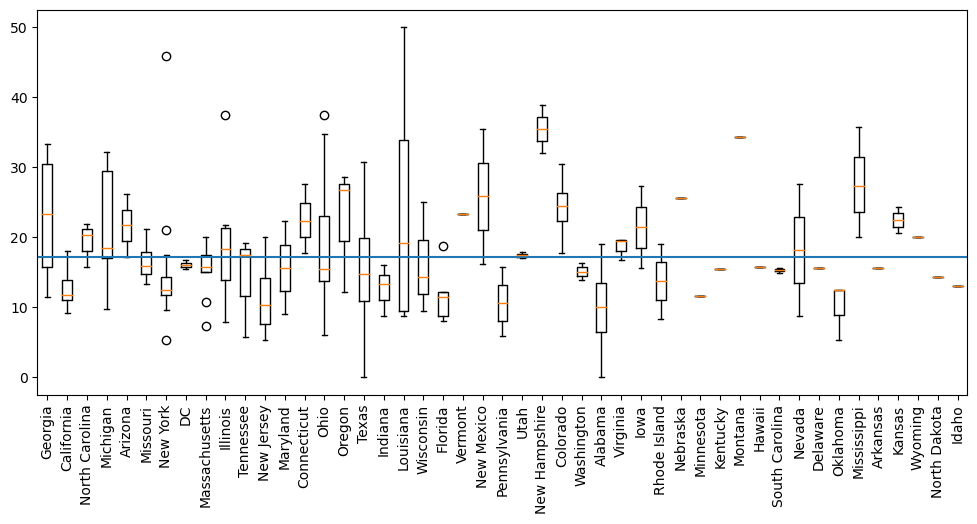

In [21]:
gah_states = {}
for i in MAGIC_states['State'].unique():
    test = MAGIC_states[MAGIC_states['State'] == i]
    gah_key = i
    gah_states[gah_key] = test['Total Percentage of Women']
fig, ax = plt.subplots(figsize=(12, 5))
ax.boxplot(gah_states.values())
ax.set_xticklabels(gah_states.keys())
plt.xticks(rotation='vertical')
plt.axhline(MAGIC_states['Total Percentage of Women'].mean())

## Incorporate NSF data


In [117]:
nsf_df = pd.read_csv("NSF DMS Awards.csv")
nsf_df['AwardedAmountToDate'] = nsf_df['AwardedAmountToDate'].apply(lambda x: x.replace('$','').replace(',','').replace('.00','')).astype(int)
nsf_df

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationStreet,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract
0,2112747,"Derived Categories, Hodge Theory, and Biration...",DMS,"ALGEBRA,NUMBER THEORY,AND COM",01/01/2021,06/07/2021,Alexander Perry,MI,Regents of the University of Michigan - Ann Arbor,Continuing Grant,...,"1109 GEDDES AVE, SUITE 3300",ANN ARBOR,MI,481091079,7.347636e+09,MPS,1264,NaN,$0.00,Algebraic geometry is the study of the geometr...
1,2112485,The Biophysics of Collective Cell Locomotion,DMS,"Cellular Dynamics and Function, MATHEMATICAL B...",01/01/2021,12/18/2020,Calina Copos,NC,University of North Carolina at Chapel Hill,Standard Grant,...,104 AIRPORT DR STE 2200,CHAPEL HILL,NC,275995023,9.199663e+09,MPS,"1114, 7334, 7454","068Z, 7465",$0.00,For a single fertilized egg cell to form into ...
2,2112311,Anisotropic Energy Functionals in Geometric An...,DMS,GEOMETRIC ANALYSIS,12/15/2020,12/16/2020,Antonio De Rosa,MD,"University of Maryland, College Park",Standard Grant,...,3112 LEE BLDG 7809 REGENTS DR,College Park,MD,207420001,3.014056e+09,MPS,1265,NaN,$0.00,Anisotropic energies were introduced by Gibbs ...
3,2107729,Fractal Fourier Extension Estimates,DMS,ANALYSIS PROGRAM,09/01/2020,11/17/2020,Xiumin Du,IL,Northwestern University,Standard Grant,...,633 CLARK STREET,EVANSTON,IL,602080001,3.125038e+09,MPS,1281,NaN,$0.00,The primary goal of this project is to explore...
4,2106419,"Geometry, groups, and dynamics",DMS,TOPOLOGY,07/01/2020,11/16/2020,Christopher Leininger,TX,William Marsh Rice University,Standard Grant,...,6100 MAIN ST,Houston,TX,770051827,7.133485e+09,MPS,1267,NaN,$0.00,The shape of an object can influence a wide va...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10018,1040927,CBMS Regional Conference in the Mathematical S...,DMS,INFRASTRUCTURE PROGRAM,01/15/2011,03/21/2011,Peter Perry,KY,University of Kentucky Research Foundation,Standard Grant,...,500 S LIMESTONE 109 KINKEAD HALL,LEXINGTON,KY,405260001,8.592579e+09,MPS,1260,"7556, 9150",$0.00,Global Harmonic Analysis<br/>NSF/CBMS Regional...
10019,1040196,MRI: Acquisition of a Shared Memory High Perfo...,DMS,Major Research Instrumentation,08/15/2011,08/02/2011,Roberto Car,NJ,Princeton University,Standard Grant,...,1 NASSAU HALL,PRINCETON,NJ,85442001,6.092583e+09,MPS,1189,NaN,$0.00,This MRI award will serve to purchase a 256 Pr...
10020,1025482,Workshop on Partial Differential Equation Mode...,DMS,"Catalyzing New Intl Collab, MATHEMATICAL BIOLOGY",03/01/2011,02/17/2011,Yuan Lou,OH,Ohio State University,Standard Grant,...,Office of Sponsored Programs,Columbus,OH,432101016,6.146889e+09,MPS,"7299, 7334","5924, 5978, 7556",$0.00,"The workshop, ""Partial Differential Equation M..."
10021,1016150,Causality as a source of efficiency in numeric...,DMS,COMPUTATIONAL MATHEMATICS,02/15/2011,08/12/2013,Alexander Vladimirsky,NY,Cornell University,Continuing Grant,...,341 PINE TREE RD,ITHACA,NY,148502820,6.072555e+09,MPS,1271,9263,$0.00,Iterative methods for large non-linear systems...


In [118]:

nsf_institution = nsf_df.groupby('Organization')['AwardedAmountToDate'].sum()
nsf_institution.sort_values(ascending=False)


Organization
University of California-Los Angeles                 84289354
Regents of the University of Michigan - Ann Arbor    57010768
Brown University                                     53770574
University of California-Berkeley                    53189368
University of Chicago                                51632352
                                                       ...   
University of San Diego                                  5590
ARMSTRONG STATE UNIVERSITY                               3976
Lewis and Clark College                                  1757
Ullman                  John           R                    0
Kennedy                 Edward         H                    0
Name: AwardedAmountToDate, Length: 879, dtype: int64

In [123]:
#MAGIC.columns
nsf_frame = nsf_institution.to_frame().reset_index()
merged_df = MAGIC.merge(nsf_institution.to_frame(), left_on = 'InstitutionName',right_on='Organization',how='left')

In [120]:
print(np.setdiff1d(MAGIC['InstitutionName'], nsf_frame['Organization']))
print(np.setdiff1d(MAGIC['InstitutionName'], nsf_frame['Organization']).size)

['Air Force Institute of Technology' 'Arizona State' 'Auburn' 'Baylor'
 'Boston University' 'Bowling Green State' 'Brandeis' 'Brown' 'CU Boulder'
 'CU Denver' 'Caltech' 'Carnegie Mellon' 'Case Western Reserve'
 'Central Michigan' 'Clarkson' 'Clemson' 'Colorado State' 'Columbia'
 'Cornell' 'Dartmouth' 'Duke' 'Emory' 'Florida State' 'George Washington'
 'Georgia State' 'Georgia Tech' 'Harvard' 'Howard' 'Illinois State'
 'Indiana University Bloomington' 'Iowa State' 'Johns Hopkins'
 'Kansas State' 'Kent State' 'LSU' 'Lehigh' 'Louisiana Tech'
 'Loyola University Chicago' 'MIT' 'Marquette' 'Michigan State'
 'Mississippi State' 'Missouri S&T' 'Montana State' 'NYU'
 'New Mexico State' 'North Carolina State' 'Northeastern'
 'Northern Illinois' 'Northwestern' 'Oklahoma State' 'Old Dominion'
 'Oregon State' 'Penn State' 'Portland State' 'Princeton' 'Purdue' 'Rice'
 'Rutgers - New Brunswick' 'Rutgers - Newark' 'SUNY Binghamton'
 'SUNY Stony Brook' 'Southern Methodist' 'Stanford' 'Syracuse'
 'Teac

In [78]:
with open("names.txt", "w") as txt_file:
    for line in np.setdiff1d(MAGIC['InstitutionName'], nsf_frame['Organization']):
        txt_file.write(line + "\n")
#write(np.setdiff1d(MAGIC['InstitutionName'], nsf_frame['Organization'])))

In [104]:
array=nsf_frame['Organization'].astype(str).sort_values().values
#print(array)
with open("NSF_names.txt", "w") as txt_file:
    for line in array:
        txt_file.write(line + "\n")

In [121]:
name_map = pd.read_csv("Insitution Names.csv")
name_map

,Wapman name,NSF name
0,Air Force Institute of Technology,NaN
1,Arizona State,Arizona State University
2,Auburn,Auburn University
3,Baylor,Baylor University
4,Boston University,Trustees of Boston University
...,...,...
118,Washington University St. Louis,Washington University
119,Wayne State,Wayne State University
120,Wesleyan,Wesleyan University
121,Western Michigan,Western Michigan University


In [124]:
merged_df2 = merged_df.merge(name_map, left_on = 'InstitutionName',right_on='Wapman name',how='left')
merged_df2
#name_map.columns

,InstitutionName,Total Men,Total Women,Total Percentage of Women,InstitutionId,TaxonomyLevel,TaxonomyValue,NonAttritionEvents,AttritionEvents,ProductionRank,PrestigeRank,OrdinalPrestigeRank,AwardedAmountToDate,Wapman name,NSF name
0,Georgia Tech,48.0,10.0,17.241379,82,Field,Mathematics,46,11,39,0.569560,47,NaN,Georgia Tech,Georgia Tech Research Corporation
1,UC Berkeley,56.0,7.0,11.111111,251,Field,Mathematics,381,106,0,0.901592,4,NaN,UC Berkeley,University of California-Berkeley
2,Duke,57.0,16.0,21.917808,60,Field,Mathematics,40,11,49,0.528242,54,NaN,Duke,Duke University
3,University of Michigan,53.0,12.0,18.461538,300,Field,Mathematics,190,48,5,0.773183,14,NaN,University of Michigan,Regents of the University of Michigan - Ann Arbor
4,University of Arizona,29.0,6.0,17.142857,247,Field,Mathematics,51,12,35,0.617208,36,16531562.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Bowling Green State,17.0,4.0,19.047619,25,Field,Mathematics,6,1,128,0.262855,146,NaN,Bowling Green State,Bowling Green State University
157,University of New Hampshire,11.0,7.0,38.888889,313,Field,Mathematics,12,3,96,0.438073,91,588193.0,NaN,NaN
158,Texas A&M University-Commerce,9.0,4.0,30.769231,64,Field,Mathematics,2,2,171,0.023964,221,NaN,Texas A&M University-Commerce,NaN
159,University of Rhode Island,17.0,4.0,19.047619,328,Field,Mathematics,5,2,133,0.273025,137,49130.0,NaN,NaN


In [125]:

merged_df3 = merged_df2.merge(nsf_institution,left_on= 'NSF name', right_on = 'Organization',how='left')

In [126]:
print(np.setdiff1d(merged_df3['InstitutionName'], nsf_frame['Organization']))
print(np.setdiff1d(merged_df3['InstitutionName'], nsf_frame['Organization']).size)

['Air Force Institute of Technology' 'Arizona State' 'Auburn' 'Baylor'
 'Boston University' 'Bowling Green State' 'Brandeis' 'Brown' 'CU Boulder'
 'CU Denver' 'Caltech' 'Carnegie Mellon' 'Case Western Reserve'
 'Central Michigan' 'Clarkson' 'Clemson' 'Colorado State' 'Columbia'
 'Cornell' 'Dartmouth' 'Duke' 'Emory' 'Florida State' 'George Washington'
 'Georgia State' 'Georgia Tech' 'Harvard' 'Howard' 'Illinois State'
 'Indiana University Bloomington' 'Iowa State' 'Johns Hopkins'
 'Kansas State' 'Kent State' 'LSU' 'Lehigh' 'Louisiana Tech'
 'Loyola University Chicago' 'MIT' 'Marquette' 'Michigan State'
 'Mississippi State' 'Missouri S&T' 'Montana State' 'NYU'
 'New Mexico State' 'North Carolina State' 'Northeastern'
 'Northern Illinois' 'Northwestern' 'Oklahoma State' 'Old Dominion'
 'Oregon State' 'Penn State' 'Portland State' 'Princeton' 'Purdue' 'Rice'
 'Rutgers - New Brunswick' 'Rutgers - Newark' 'SUNY Binghamton'
 'SUNY Stony Brook' 'Southern Methodist' 'Stanford' 'Syracuse'
 'Teac

In [127]:
merged_df3

,InstitutionName,Total Men,Total Women,Total Percentage of Women,InstitutionId,TaxonomyLevel,TaxonomyValue,NonAttritionEvents,AttritionEvents,ProductionRank,PrestigeRank,OrdinalPrestigeRank,AwardedAmountToDate_x,Wapman name,NSF name,AwardedAmountToDate_y
0,Georgia Tech,48.0,10.0,17.241379,82,Field,Mathematics,46,11,39,0.569560,47,NaN,Georgia Tech,Georgia Tech Research Corporation,41189410.0
1,UC Berkeley,56.0,7.0,11.111111,251,Field,Mathematics,381,106,0,0.901592,4,NaN,UC Berkeley,University of California-Berkeley,53189368.0
2,Duke,57.0,16.0,21.917808,60,Field,Mathematics,40,11,49,0.528242,54,NaN,Duke,Duke University,22439849.0
3,University of Michigan,53.0,12.0,18.461538,300,Field,Mathematics,190,48,5,0.773183,14,NaN,University of Michigan,Regents of the University of Michigan - Ann Arbor,57010768.0
4,University of Arizona,29.0,6.0,17.142857,247,Field,Mathematics,51,12,35,0.617208,36,16531562.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Bowling Green State,17.0,4.0,19.047619,25,Field,Mathematics,6,1,128,0.262855,146,NaN,Bowling Green State,Bowling Green State University,1200538.0
157,University of New Hampshire,11.0,7.0,38.888889,313,Field,Mathematics,12,3,96,0.438073,91,588193.0,NaN,NaN,NaN
158,Texas A&M University-Commerce,9.0,4.0,30.769231,64,Field,Mathematics,2,2,171,0.023964,221,NaN,Texas A&M University-Commerce,NaN,NaN
159,University of Rhode Island,17.0,4.0,19.047619,328,Field,Mathematics,5,2,133,0.273025,137,49130.0,NaN,NaN,NaN


In [133]:
merged_df3['AwardedAmount']=merged_df3['AwardedAmountToDate_x'].fillna(0)+merged_df3['AwardedAmountToDate_y'].fillna(0)
merged_df3[['InstitutionName','Total Percentage of Women','OrdinalPrestigeRank','AwardedAmount']]

,InstitutionName,Total Percentage of Women,OrdinalPrestigeRank,AwardedAmount
0,Georgia Tech,17.241379,47,41189410.0
1,UC Berkeley,11.111111,4,53189368.0
2,Duke,21.917808,54,22439849.0
3,University of Michigan,18.461538,14,57010768.0
4,University of Arizona,17.142857,36,16531562.0
...,...,...,...,...
156,Bowling Green State,19.047619,146,1200538.0
157,University of New Hampshire,38.888889,91,588193.0
158,Texas A&M University-Commerce,30.769231,221,0.0
159,University of Rhode Island,19.047619,137,49130.0
